In [283]:
import requests
import csv
import pandas as pd
from io import StringIO
import pandas as pd
#from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # Investigar

## Funcion que exporta los datasets como csv.

In [284]:
def to_csv(df):
    if df.empty():
        return 'El dataframe esta vacio.'
    df.to_csv(f'{df}.csv',index=False)
    return 'Exportación completada'

## Cargo todos los datasets

In [285]:
pen_int=pd.read_excel('./datasets/1. Internet_Penetracion.xlsx',sheet_name='Total') # Penetracion total
pen_prov=pd.read_excel('./datasets/1. Internet_Penetracion.xlsx',sheet_name='Provincia') # Penetracion por provincia

tot_nac_acc_fijo_ba_ban = pd.read_excel('./datasets/2 . Internet_BAF.xlsx',sheet_name='Total') # Acceso BAF total
tot_prov_acc_fijo_ba_ban = pd.read_excel('./datasets/2 . Internet_BAF.xlsx',sheet_name='Provincial') # Acceso BAF provincia

acc_tec = pd.read_excel('./datasets/3 .Internet_Accesos-por-tecnologia.xlsx',sheet_name='Total') # Acceso por tecnologia total
acc_tec_prov = pd.read_excel('./datasets/3 .Internet_Accesos-por-tecnologia.xlsx',sheet_name='Provincial') # Acceso por tecnologia provincia

hist_vel = pd.read_excel('./datasets/4 . historico_velocidad_internet.xlsx',sheet_name='Total') # Historico velocidad 
hist_vel_prov = pd.read_excel('./datasets/4 . historico_velocidad_internet.xlsx',sheet_name='Provincial') # Historico velocidad provincial

acc_vel = pd.read_excel('./datasets/5 . Internet_Accesos-por-velocidad.xlsx',sheet_name='Total') # acceso por velocidad
acc_vel_prov = pd.read_excel('./datasets/5 . Internet_Accesos-por-velocidad.xlsx',sheet_name='Provincia') # acceso por velocidad provincial
acc_vel_prov_SR = pd.read_excel('./datasets/5 . Internet_Accesos-por-velocidad.xlsx',sheet_name='Provincia Sin rangos') # acceso por velocidad provincial sin rango

ingressos = pd.read_excel('./datasets/6 . Internet_Ingresos.xlsx') # Ingresos

acc_por_loc_vel = pd.read_excel('./datasets/7 . Internet_Accesos-por-velocidad_por loc.xlsx') # Acceso por localidad

acc_tec_loc = pd.read_excel('./datasets/8. Internet-Accesos-por-tecno_por_loc.xlsx')

map_conectividad = pd.read_excel('./datasets/9 . mapa_conectividad.xlsx')



## Datasets Penetracion

In [286]:
pen_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           36 non-null     int64  
 1   Trimestre                     36 non-null     int64  
 2   Accesos por cada 100 hogares  36 non-null     float64
 3   Accesos por cada 100 hab      36 non-null     float64
 4   Periodo                       36 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ KB


In [287]:
pen_int.sample(5)

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
3,2022,1,73.878803,23.049171,Ene-Mar 2022
9,2020,3,66.310000,20.590000,Jul-Sept 2020
17,2018,3,60.690000,18.730000,Jul-Sept 2018
33,2014,3,50.672368,15.428769,Jul-Sept 2014
25,2016,3,53.734186,16.504676,Jul-Sept 2016


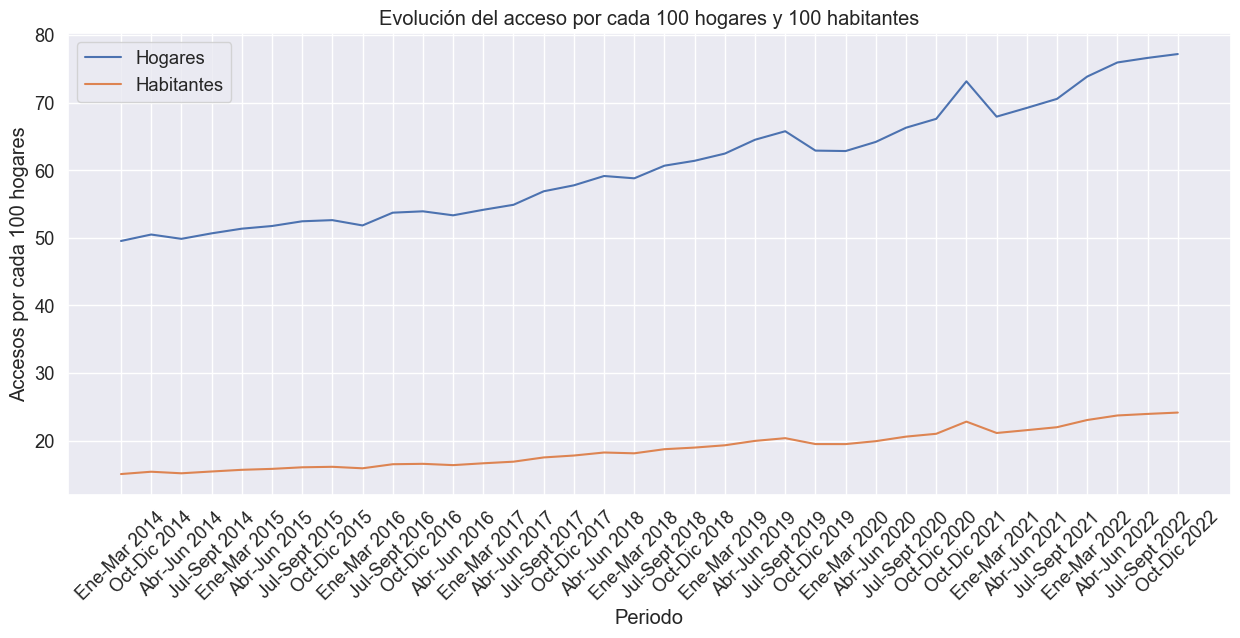

In [288]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=pen_int.sort_values(by='Año',ascending=True),x='Periodo',y='Accesos por cada 100 hogares',label='Hogares')
sns.lineplot(data=pen_int.sort_values(by='Año',ascending=True),x='Periodo',y='Accesos por cada 100 hab',label='Habitantes')
plt.title('Evolución del acceso por cada 100 hogares y 100 habitantes')
plt.legend()
plt.xticks(rotation=45)
plt.show()

A finales del 2020 y finales del 2021 se ve un aumento brusco lo cual podria deberse al aislamiento

In [289]:
pen_prov.sample(5)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos por cada 100 hab
546,2017,2,San Luis,9.513970,2.723000
90,2022,1,San Luis,80.724231,23.101656
220,2020,3,Chubut,68.343898,20.948715
844,2014,1,Chubut,41.235218,12.703590
568,2017,1,Salta,32.575489,7.890126


In [290]:
pen_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hogares  864 non-null    float64
 4   Accesos por cada 100 hab      864 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 33.9+ KB


In [291]:
pen_prov.describe()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,864.000000,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,49.620138,14.805076
std,2.583484,1.118682,23.319298,9.021663
min,2014.000000,1.000000,9.347208,2.684669
25%,2016.000000,1.750000,32.216632,8.392606
50%,2018.000000,2.500000,46.386588,12.872149
75%,2020.000000,3.250000,62.442698,19.079294
max,2022.000000,4.000000,124.061394,52.236739


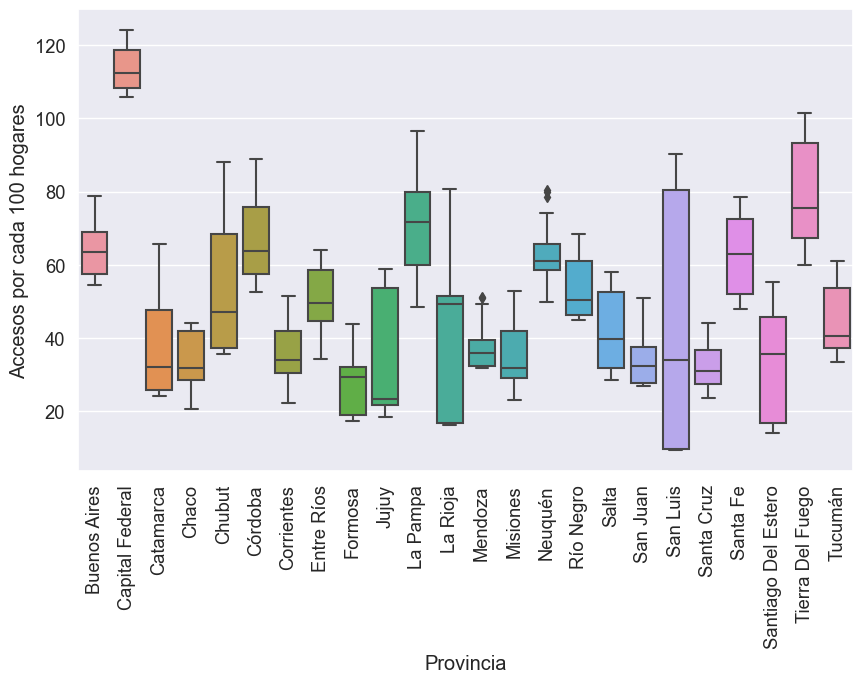

In [292]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pen_prov,y='Accesos por cada 100 hogares',x='Provincia')
plt.xticks(rotation=90)
plt.show()

In [293]:
pen_prov[pen_prov['Provincia']=='Neuquén'].sort_values(by='Accesos por cada 100 hogares',ascending=False).iloc[:4]

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos por cada 100 hab
38,2022,3,Neuquén,80.370000,23.920000
62,2022,2,Neuquén,80.020000,23.817458
14,2022,4,Neuquén,78.670000,23.410000
86,2022,1,Neuquén,74.173055,22.077460


In [294]:
pen_prov[pen_prov['Provincia']=='Mendoza'].sort_values(by='Accesos por cada 100 hogares',ascending=False).iloc[:4]

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos por cada 100 hab
12,2022,4,Mendoza,51.360000,14.330000
36,2022,3,Mendoza,51.030000,14.240000
60,2022,2,Mendoza,49.390000,13.782234
84,2022,1,Mendoza,48.735241,13.599477


Segun el ENACOM en el año 2022 hubo un aumento del mas del 200% en la penetracion cada 100 hogares en toda la Argentina

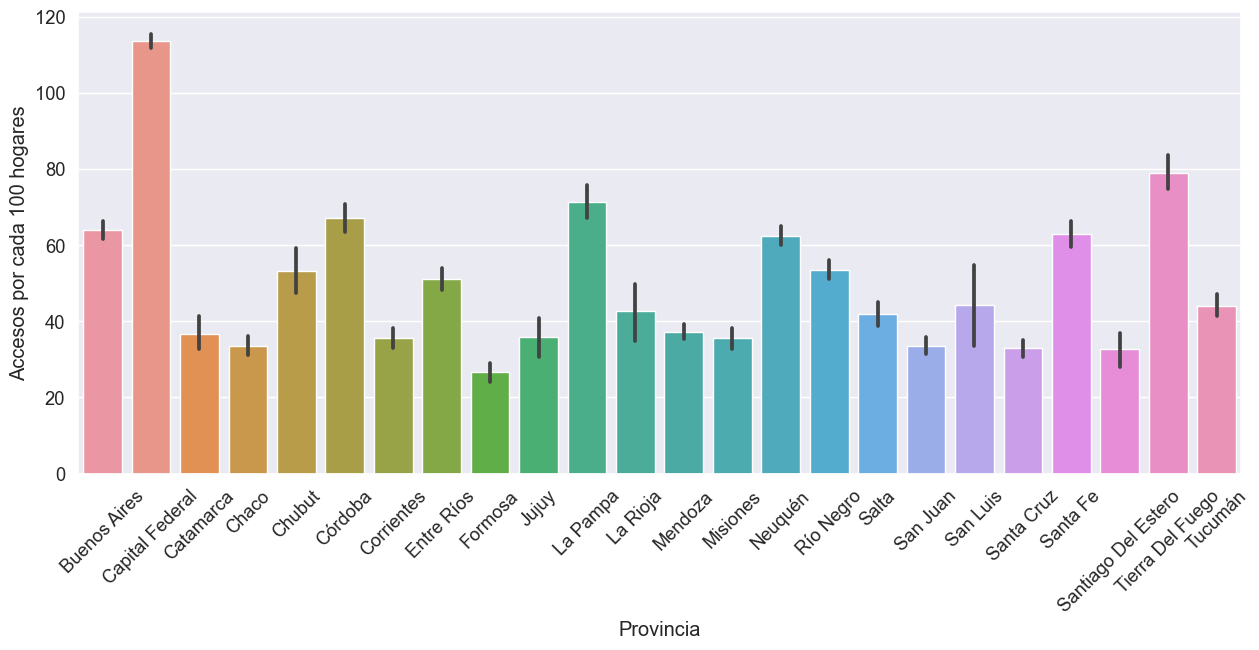

In [295]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Provincia', y='Accesos por cada 100 hogares', data=pen_prov)
plt.xticks(rotation=45)
plt.show()


## Datasets de acceso a internet fijo banda ancha y baja nacional y provincial


In [296]:
tot_nac_acc_fijo_ba_ban.sample(5)

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
10,2020,2,9021040,10016,9031056,Abr-Jun 2020
7,2021,1,9637956,10016,9647972,Ene-Mar 2021
8,2020,4,9561546,10016,9571562,Oct-Dic 2020
34,2014,2,6428329,36139,6464468,Abr-Jun 2014
19,2018,1,8009981,27072,8037053,Ene-Mar 2018


### Veo una informacion general para encontrar nulos y tipos de variables

In [297]:
tot_nac_acc_fijo_ba_ban.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               36 non-null     int64 
 1   Trimestre         36 non-null     int64 
 2   Banda ancha fija  36 non-null     int64 
 3   Dial up           36 non-null     int64 
 4   Total             36 non-null     int64 
 5   Periodo           36 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.8+ KB


### Ahora voy a adentrarme en los valores

In [298]:
tot_nac_acc_fijo_ba_ban.describe()

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,36.000000,36.000000,3.600000e+01,36.000000,3.600000e+01
mean,2018.000000,2.500000,8.355563e+06,23079.555556,8.378642e+06
std,2.618615,1.133893,1.471390e+06,10107.978375,1.462265e+06
min,2014.000000,1.000000,6.362108e+06,9991.000000,6.398398e+06
25%,2016.000000,1.750000,7.061275e+06,12436.750000,7.093767e+06
50%,2018.000000,2.500000,8.201878e+06,26861.500000,8.228740e+06
75%,2020.000000,3.250000,9.400024e+06,32491.750000,9.410040e+06
max,2022.000000,4.000000,1.119567e+07,39324.000000,1.120811e+07


In [299]:
tot_prov_acc_fijo_ba_ban.sample(5)

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
529,2017,2,Capital Federal,1592175,8016.0,1600191
584,2016,4,Formosa,29513,0.0,29513
561,2017,1,Jujuy,43202,1.0,43203
848,2014,1,Formosa,25335,87.0,25422
353,2019,2,San Juan,69461,564.0,70025


In [300]:
tot_prov_acc_fijo_ba_ban.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               864 non-null    int64  
 1   Trimestre         864 non-null    int64  
 2   Provincia         864 non-null    object 
 3   Banda ancha fija  864 non-null    int64  
 4   Dial up           862 non-null    float64
 5   Total             864 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 40.6+ KB


In [301]:
tot_prov_acc_fijo_ba_ban[tot_prov_acc_fijo_ba_ban['Dial up'].isnull()]

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
440,2018,2,Formosa,44554,NaN,44554
445,2018,2,Misiones,106147,NaN,106147


Estos nulos representan 0 ya que el total es la suma de Banda ancha fija y Dial up por estos seran remplazados

In [302]:
tot_prov_acc_fijo_ba_ban.fillna(0,inplace=True)

In [303]:
tot_prov_acc_fijo_ba_ban[tot_prov_acc_fijo_ba_ban['Provincia']=='Córdoba'].sort_values(by='Banda ancha fija',ascending=True).iloc[:4]

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
845,2014,1,Córdoba,566705,205.0,566910
821,2014,2,Córdoba,576747,205.0,576952
797,2014,3,Córdoba,585231,200.0,585431
773,2014,4,Córdoba,590113,319.0,590432


## Acceso a internet fijo por tecnologia

In [304]:

acc_tec.sample(5)

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
35,2014,1,3697066,2407330,150323,70749,72930,6398398,Ene-Mar 2014
14,2019,2,2990457,4635575,760794,308027,265328,8960181,Abr-Jun 2019
26,2016,2,3782085,3035272,167788,85452,59482,7130079,Abr-Jun 2016
28,2015,4,3803024,2898226,139187,85726,58668,6984831,Oct-Dic 2015
8,2020,4,2213949,5371824,1311199,421554,253036,9571562,Oct-Dic 2020


In [305]:
acc_tec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           36 non-null     int64 
 1   Trimestre     36 non-null     int64 
 2   ADSL          36 non-null     int64 
 3   Cablemodem    36 non-null     int64 
 4   Fibra óptica  36 non-null     int64 
 5   Wireless      36 non-null     int64 
 6   Otros         36 non-null     int64 
 7   Total         36 non-null     int64 
 8   Periodo       36 non-null     object
dtypes: int64(8), object(1)
memory usage: 2.7+ KB


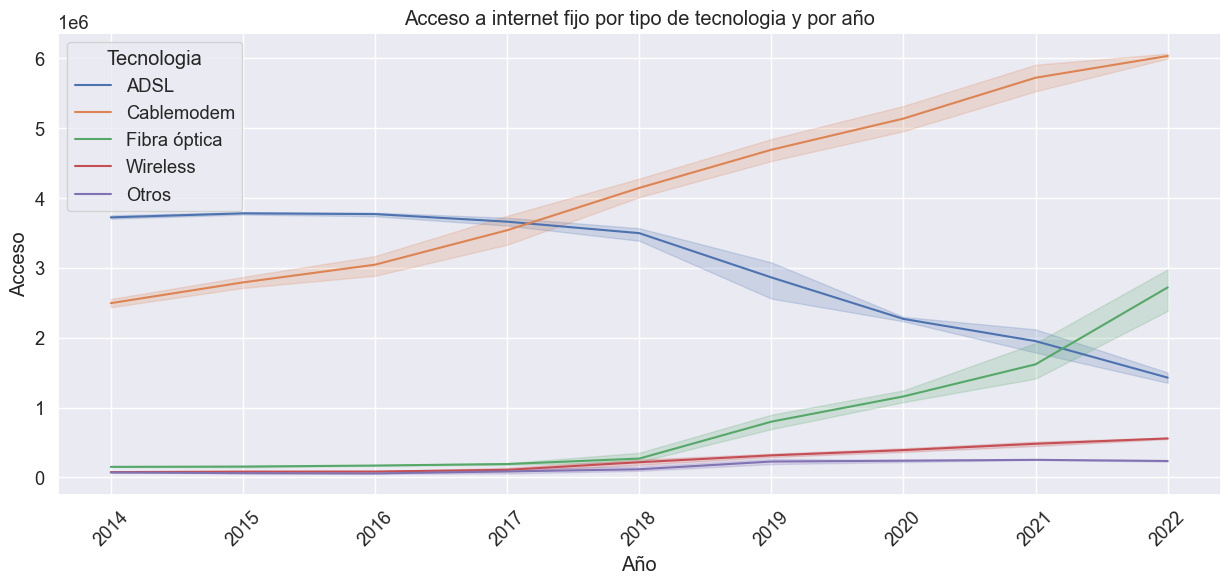

In [306]:
melted_df = pd.melt(acc_tec.sort_values(by='Año',ascending=True), id_vars=['Año'], 
                    value_vars=['ADSL', 'Cablemodem','Fibra óptica','Wireless','Otros'],
                    var_name='Tecnologia', value_name='Acceso')
plt.figure(figsize=(15, 6))
sns.lineplot(data=melted_df, x='Año', y='Acceso', hue='Tecnologia')
plt.xticks(rotation=45)
plt.xlabel('Año')
plt.ylabel('Acceso')
plt.title('Acceso a internet fijo por tipo de tecnologia y por año')
plt.show()

Noticia: [Noticia ENACOM](https://www.baenegocios.com/negocios/El-desafio-de-la-Argentina-en-el-camino-de-la-fibra-optica-20200610-0092.html)
Segun el ENACOM a partir del año 2019 comenzo a haber un aumento significativo (220%) en el uso de la fibra optica
Ademas el aumento de las nuevos tecnologias al alcance de mas gente hicieron que ADSL cada vez fuera menos relevante,
Ademas la tecnologia ADSL la cual y avenia decayendo comenzo dacaer de una forma mas abrupta a medida que umentaron otras tecnologias, debido a la demanda de un internet de mayor calidad.

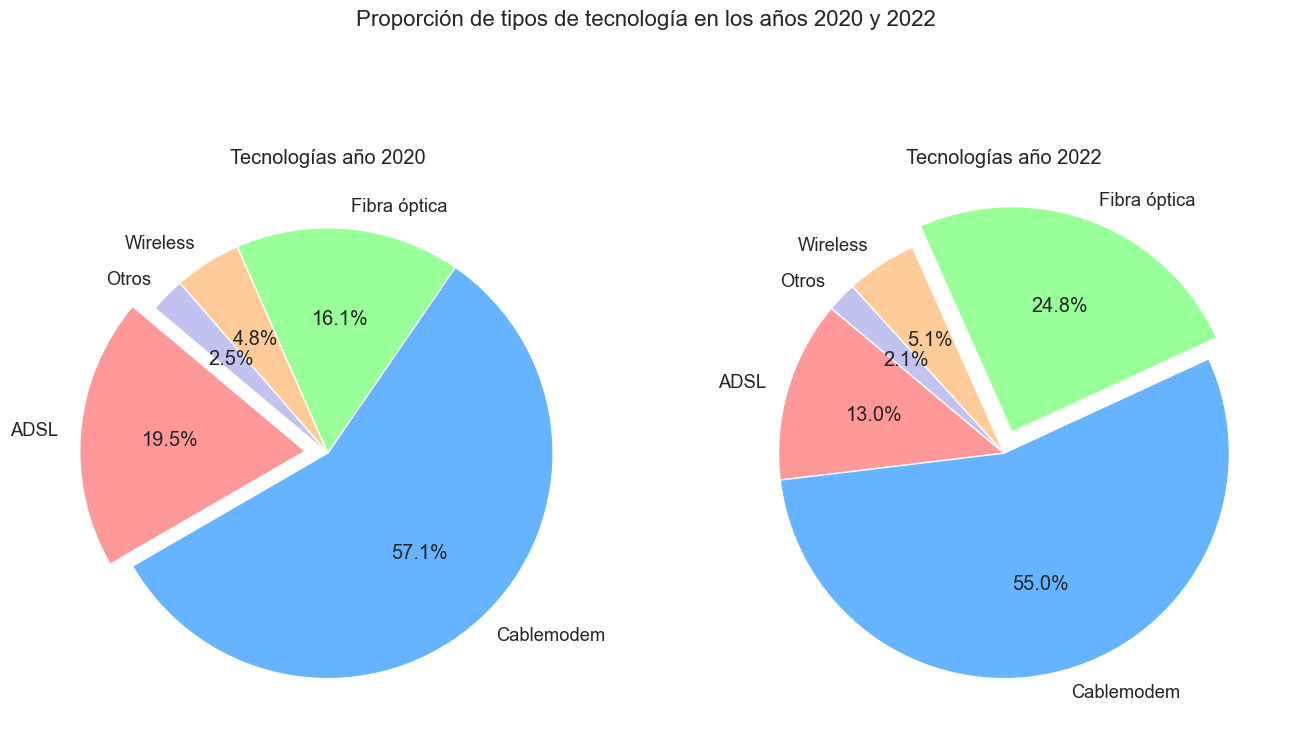

In [307]:

datos_anio_2022 = acc_tec.groupby('Año')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum().reset_index().iloc[8,1:]
datos_anio_2020 = acc_tec.groupby('Año')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum().reset_index().iloc[7,1:]
# Etiquetas de los tipos de conexión
tipos_de_conexion = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

# Colores para cada porción del gráfico
colores = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Explotar la porción 'Fibra óptica'
explode1 = (0, 0, 0.1, 0, 0)
explode2 = (0.1, 0, 0, 0, 0)

# Crear el gráfico de torta
# Crear el gráfico de torta
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].pie(datos_anio_2020, labels=tipos_de_conexion, autopct='%1.1f%%', startangle=140, colors=colores, explode=explode2)
ax[1].pie(datos_anio_2022, labels=tipos_de_conexion, autopct='%1.1f%%', startangle=140, colors=colores, explode=explode1)

# Agregar títulos a los subgráficos
ax[0].set_title('Tecnologías año 2020')
ax[1].set_title('Tecnologías año 2022')

# Agregar leyendas


# Agregar título a la figura
fig.suptitle('Proporción de tipos de tecnología en los años 2020 y 2022', fontsize=16, y=1.05)

# Mostrar el gráfico
plt.show()


Desde hace varios años que ADSL venia en decaimiento con la llegada de nuevas tecnologias, tambien puede verse como el cablemodem la mas usada en los ultimos años, sufre una leve bajada de accesos que podrian explicarse con el aumento de nuevas tecnologias como fibra óptica y tecnologias inhalambricas , este aumento en la demanda podria estar potenciado por el aislamiento y la necesidad de una mayor capacidad de conexon debido al aumento de servicios como streaming.
Una de las razones de este aumento en la fibra optica podria ser el plan conectar

In [308]:
acc_tec_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           865 non-null    object 
 1   Trimestre     865 non-null    object 
 2   Provincia     864 non-null    object 
 3   ADSL          864 non-null    float64
 4   Cablemodem    864 non-null    float64
 5   Fibra óptica  864 non-null    float64
 6   Wireless      864 non-null    float64
 7   Otros         864 non-null    float64
 8   Total         864 non-null    float64
dtypes: float64(6), object(3)
memory usage: 61.0+ KB


In [309]:
acc_tec_prov[acc_tec_prov['Provincia'].isnull()]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
865,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [310]:
acc_tec_prov.dropna(inplace=True)

In [311]:
acc_tec_prov[acc_tec_prov['Año'] == '2019 *']

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
312,2019 *,3 *,Buenos Aires,1277249.0,2144956.0,425386.0,85572.0,27070.0,3960233.0
313,2019 *,3 *,Capital Federal,300288.0,1080973.0,24900.0,3895.0,31155.0,1441211.0
314,2019 *,3 *,Catamarca,24349.0,5543.0,13.0,244.0,2251.0,32400.0
315,2019 *,3 *,Chaco,50416.0,49156.0,8063.0,5224.0,1592.0,114451.0
316,2019 *,3 *,Chubut,37298.0,27090.0,1917.0,15149.0,7551.0,89005.0
...,...,...,...,...,...,...,...,...,...
379,2019 *,1 *,Santa Cruz,10659.0,4615.0,382.0,6514.0,2735.0,24905.0
380,2019 *,1 *,Santa Fe,340038.0,340344.0,15621.0,23215.0,17860.0,737078.0
381,2019 *,1 *,Santiago Del Estero,25337.0,61547.0,23.0,2847.0,99.0,89853.0
382,2019 *,1 *,Tierra Del Fuego,19789.0,23549.0,1623.0,0.0,1486.0,46447.0


### Remplazo el año 2019 * y el trimestre con *

In [312]:
acc_tec_prov['Año'].replace('2019 *','2019',inplace=True)
acc_tec_prov['Trimestre'].replace('1 *','1',inplace=True)
acc_tec_prov['Trimestre'].replace('2 *','1',inplace=True)
acc_tec_prov['Trimestre'].replace('3 *','3',inplace=True)
acc_tec_prov['Trimestre'].replace('4 *','4',inplace=True)


In [313]:
acc_tec_prov[['Año','Trimestre']] = acc_tec_prov[['Año','Trimestre']].astype(int)

In [314]:
acc_tec_prov.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,864.000000,864.000000,8.640000e+02,8.640000e+02,8.640000e+02,864.000000,864.000000,8.640000e+02
mean,2018.000000,2.472222,1.255457e+05,1.739913e+05,3.262331e+04,10720.798611,6228.967593,3.491101e+05
std,2.583484,1.142933,2.520514e+05,4.276313e+05,1.325430e+05,18723.092796,10740.931282,7.494854e+05
min,2014.000000,1.000000,6.120000e+03,0.000000e+00,0.000000e+00,0.000000,2.000000,1.255700e+04
25%,2016.000000,1.000000,2.232025e+04,8.912500e+03,2.052500e+02,261.000000,313.000000,5.232900e+04
50%,2018.000000,2.500000,4.816100e+04,3.498400e+04,1.233000e+03,4377.000000,1862.500000,1.045965e+05
75%,2020.000000,3.250000,1.025470e+05,7.168325e+04,1.564250e+04,12673.750000,7128.000000,1.801745e+05
max,2022.000000,4.000000,1.586343e+06,2.767247e+06,1.499149e+06,129910.000000,73415.000000,4.794665e+06


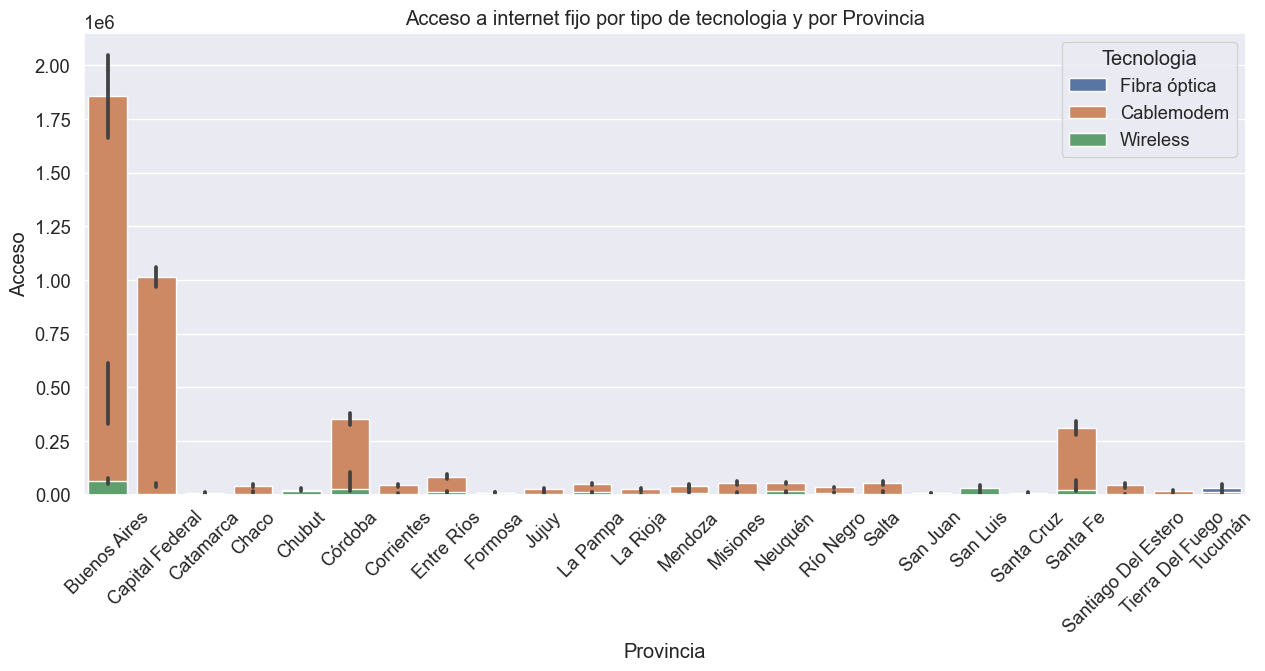

In [315]:
melted_df = pd.melt(acc_tec_prov, id_vars=['Provincia'], 
                    value_vars=['Fibra óptica','Cablemodem','Wireless'],
                    var_name='Tecnologia', value_name='Acceso')
plt.figure(figsize=(15, 6))
sns.barplot(data=melted_df, x='Provincia', y='Acceso', hue='Tecnologia', dodge=False)
plt.xticks(rotation=45)
plt.xlabel('Provincia')
plt.ylabel('Acceso')
plt.title('Acceso a internet fijo por tipo de tecnologia y por Provincia')
plt.show()

## Historico velocidad

In [316]:
hist_vel.sample(5)

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
35,2014,1,3.617127,Ene-Mar 2014
23,2017,1,6.624079,Ene-Mar 2017
10,2020,2,38.320000,Abr-Jun 2020
27,2016,1,5.083702,Ene-Mar 2016
30,2015,2,4.545381,Abr-Jun 2015


In [317]:
hist_vel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     36 non-null     int64  
 1   Trimestre               36 non-null     int64  
 2   Mbps (Media de bajada)  36 non-null     float64
 3   Trimestre.1             36 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.3+ KB


In [318]:
hist_vel.rename({'Trimestre.1':'Periodo'},inplace=True)

In [319]:
hist_vel.sort_values(by='Mbps (Media de bajada)',ascending=False).iloc[:5]

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,4,106.56,Oct-Dic 2022
1,2022,3,62.46,Jul-Sept 2022
2,2022,2,58.44,Abr-Jun 2022
3,2022,1,55.11,Ene-Mar 2022
4,2021,4,52.34,Oct-Dic 2021


In [320]:
hist_vel_prov.sample(5)

,Año,Trimestre,Provincia,Mbps (Media de bajada)
109,2021,4,Misiones,38.903349
543,2017,2,Río Negro,4.741351
828,2014,2,Mendoza,3.503033
434,2018,2,Catamarca,7.693097
86,2022,1,Neuquén,43.050000


In [321]:
hist_vel_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     864 non-null    int64  
 1   Trimestre               864 non-null    int64  
 2   Provincia               864 non-null    object 
 3   Mbps (Media de bajada)  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


In [322]:
hist_vel_prov.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,15.375182
std,2.583484,1.118682,18.320956
min,2014.000000,1.000000,2.573729
25%,2016.000000,1.750000,4.316775
50%,2018.000000,2.500000,7.416094
75%,2020.000000,3.250000,19.709719
max,2022.000000,4.000000,182.860000


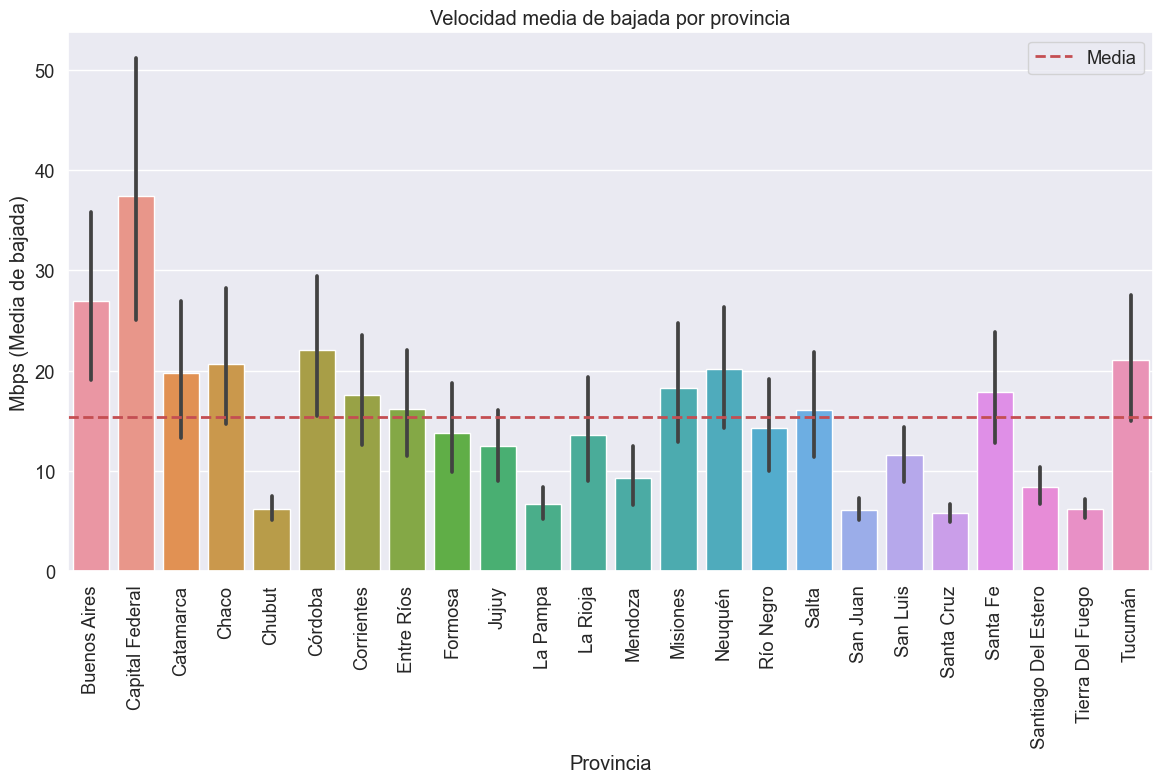

In [323]:
plt.figure(figsize=(14,7))
promedio = hist_vel_prov['Mbps (Media de bajada)'].mean()
sns.barplot(data=hist_vel_prov,x='Provincia',y='Mbps (Media de bajada)')
plt.axhline(y=promedio, color='r', linestyle='--', linewidth=2, label='Media')
plt.legend()
plt.title('Velocidad media de bajada por provincia')
plt.xticks(rotation=90)
plt.show()

## Aceesos por velocidad

In [324]:
acc_vel.sample(5)

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
30,2015,2,40723,500175,5138431,645440,432762,10045,18529,0,6786105
13,2019,3,241713,80599,3309137,1026859,806466,1141545,2314898,243467,9164684
15,2019,1,166573,195706,3428759,882836,1464748,1244215,1138728,126570,8648135
23,2017,1,20653,230159,4584534,975027,1129987,210668,47990,0,7199018
1,2022,3,33013,96727,1161370,1151906,823505,479822,6995750,349035,11091128


In [325]:
acc_vel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Año                      36 non-null     int64
 1   Trimestre                36 non-null     int64
 2   Hasta 512 kbps           36 non-null     int64
 3   Entre 512 Kbps y 1 Mbps  36 non-null     int64
 4   Entre 1 Mbps y 6 Mbps    36 non-null     int64
 5   Entre 6 Mbps y 10 Mbps   36 non-null     int64
 6   Entre 10 Mbps y 20 Mbps  36 non-null     int64
 7   Entre 20 Mbps y 30 Mbps  36 non-null     int64
 8   Más de 30 Mbps           36 non-null     int64
 9   OTROS                    36 non-null     int64
 10  Total                    36 non-null     int64
dtypes: int64(11)
memory usage: 3.2 KB


In [326]:
acc_vel.describe()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
count,36.000000,36.000000,36.000000,36.000000,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,36.000000,3.600000e+01
mean,2018.000000,2.500000,49571.638889,239046.083333,3.552501e+06,9.034036e+05,9.147367e+05,4.990417e+05,2.053382e+06,126059.500000,8.337742e+06
std,2.618615,1.133893,52406.958667,198205.544715,1.342734e+06,2.453029e+05,4.818186e+05,4.658192e+05,2.498904e+06,120429.285661,1.504414e+06
min,2014.000000,1.000000,5675.000000,28521.000000,1.075272e+06,2.891820e+05,1.011270e+05,3.450000e+02,1.159500e+04,0.000000,6.272846e+06
25%,2016.000000,1.750000,28412.500000,74491.750000,2.634148e+06,7.884982e+05,6.803692e+05,6.239875e+04,2.761000e+04,0.000000,7.085635e+06
50%,2018.000000,2.500000,38879.500000,216701.500000,3.415018e+06,9.781860e+05,8.111225e+05,4.975755e+05,4.845840e+05,155810.000000,8.228740e+06
75%,2020.000000,3.250000,41184.000000,389368.250000,4.970678e+06,1.065288e+06,1.139898e+06,6.358098e+05,4.099905e+06,199011.250000,9.410040e+06
max,2022.000000,4.000000,241713.000000,687619.000000,5.153437e+06,1.245333e+06,2.068087e+06,1.688748e+06,7.410902e+06,394282.000000,1.120811e+07


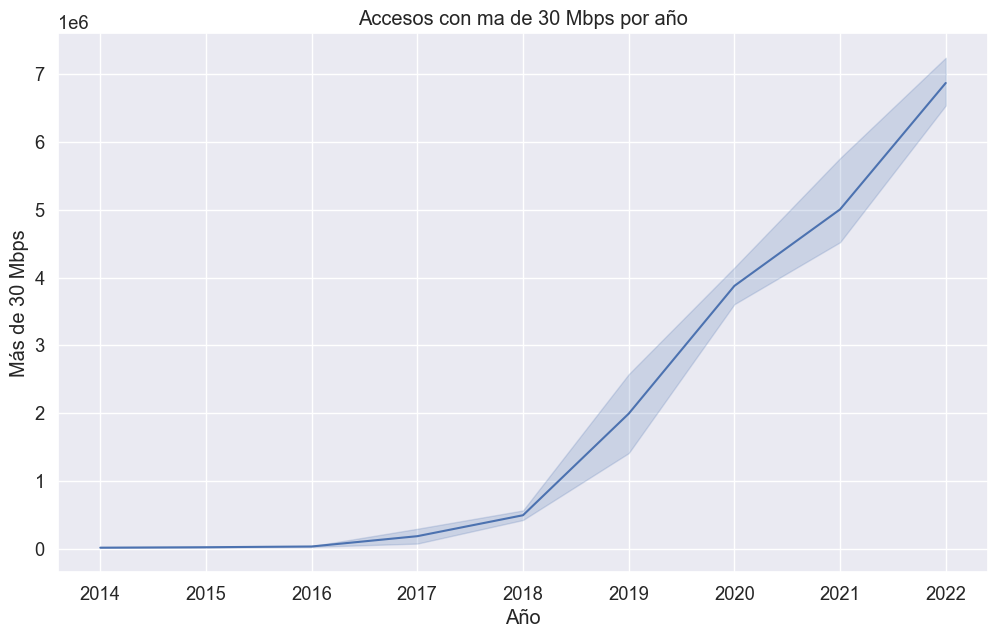

In [327]:

plt.figure(figsize=(12,7))
sns.lineplot(data=acc_vel,y='Más de 30 Mbps',x='Año')
plt.title('Accesos con ma de 30 Mbps por año')
plt.show()

Como aumento de la expansion de fibra optica y cablemoden a principios de 2019 se ve un claro aumento de la cantidad de acceso mayor a 30mbps a partir de este año

In [328]:
acc_vel_prov.sample(5)

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
210,2020,4,San Luis,58.0,0.0,14020.0,3490.0,2688.0,62239.0,22.0,36918.0,119435.0
695,2015,4,Tucumán,107.0,21800.0,83887.0,29942.0,9507.0,837.0,0.0,0.0,146080.0
296,2019,4,Formosa,1127.0,191.0,24606.0,6319.0,6788.0,1766.0,5671.0,243.0,46711.0
722,2015,2,Catamarca,15.0,7253.0,14003.0,3776.0,593.0,37.0,1.0,0.0,25678.0
320,2019,3,Formosa,1110.0,349.0,24943.0,6049.0,7117.0,2262.0,4443.0,100.0,46373.0


In [329]:
acc_vel_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  864 non-null    int64  
 1   Trimestre            864 non-null    int64  
 2   Provincia            864 non-null    object 
 3   HASTA 512 kbps       864 non-null    float64
 4   + 512 Kbps - 1 Mbps  864 non-null    float64
 5   + 1 Mbps - 6 Mbps    864 non-null    float64
 6   + 6 Mbps - 10 Mbps   864 non-null    float64
 7   + 10 Mbps - 20 Mbps  864 non-null    float64
 8   + 20 Mbps - 30 Mbps  864 non-null    float64
 9   + 30 Mbps            864 non-null    float64
 10  OTROS                858 non-null    float64
 11  Total                864 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 81.1+ KB


In [330]:
acc_vel_prov[acc_vel_prov['OTROS'].isnull()]

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
337,2019,2,Capital Federal,74.0,1027.0,281370.0,124087.0,239691.0,296155.0,475991.0,NaN,1418395.0
347,2019,2,La Rioja,9.0,11.0,39819.0,4297.0,4857.0,13.0,1298.0,NaN,50304.0
348,2019,2,Mendoza,20.0,2522.0,205165.0,2971.0,10092.0,1256.0,234.0,NaN,222260.0
355,2019,2,Santa Cruz,25.0,84.0,24861.0,3806.0,1202.0,28.0,4.0,NaN,30010.0
358,2019,2,Tierra Del Fuego,6.0,123.0,41824.0,4241.0,1573.0,96.0,32.0,NaN,47895.0
359,2019,2,Tucumán,16.0,157.0,78891.0,44296.0,24291.0,628.0,18394.0,NaN,166673.0


In [331]:
rangos = acc_vel_prov.drop(columns=['Año','Trimestre','Provincia','Total']).columns
acc_vel_prov[rangos].sum(axis=1)-acc_vel_prov['Total']


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
859    0.0
860    0.0
861    0.0
862    0.0
863    0.0
Length: 864, dtype: float64

Voy a remplazar los nulos de OTROS por 0

In [332]:
acc_vel_prov.fillna(0,inplace=True)

## Ingresos


In [333]:
ingressos.sample(5)

,Año,Trimestre,Ingresos (miles de pesos),Periodo
4,2021,4,4.546789e+07,Oct-Dic 2021
9,2020,3,3.199744e+07,Jul-Sept 2020
7,2021,1,3.667637e+07,Ene-Mar 2021
31,2015,1,4.876385e+06,Ene-Mar 2015
18,2018,2,1.431947e+07,Abr-Jun 2018


In [334]:
ingressos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        36 non-null     int64  
 1   Trimestre                  36 non-null     int64  
 2   Ingresos (miles de pesos)  36 non-null     float64
 3   Periodo                    36 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.3+ KB


In [335]:
ingressos.describe()

,Año,Trimestre,Ingresos (miles de pesos)
count,36.000000,36.000000,3.600000e+01
mean,2018.000000,2.500000,2.193842e+07
std,2.618615,1.133893,1.930189e+07
min,2014.000000,1.000000,2.984054e+06
25%,2016.000000,1.750000,6.384892e+06
50%,2018.000000,2.500000,1.486522e+07
75%,2020.000000,3.250000,3.246178e+07
max,2022.000000,4.000000,7.244348e+07


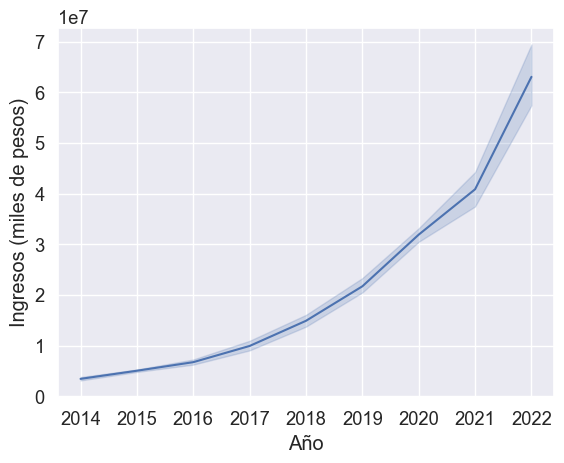

In [336]:
sns.lineplot(data=ingressos,y='Ingresos (miles de pesos)',x='Año')
plt.show()

## Acceso por velocidad por localidad

In [337]:
acc_por_loc_vel.sample(5)

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,950 Mbps,1000 Mbps,1024 Mbps,Total general
1859,MENDOZA,La Paz,La Paz,50042020,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,387.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.0
96,BUENOS AIRES,Bolívar,Urdampilleta,6105070,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.0
2229,SALTA,Cachi,Payogasta,66014020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0
386,BUENOS AIRES,Lanús,Valentín Alsina,6434010,1.0,NaN,NaN,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,NaN,19676.0


In [338]:
acc_por_loc_vel.fillna(0,inplace=True)

## Acceso por tecnologia por localidad

In [339]:
acc_tec_loc.sample(5)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
1054,CORDOBA,Marcos Juárez,Monte Buey,14063190,1563,0,0,0,0,0,0,0,1563
2761,SANTA FE,Las Colonias,Hipatia,82070090,0,0,0,0,0,0,0,53,53
382,BUENOS AIRES,Lanús,Valentín Alsina,6434010,192,7221,79,12116,91,0,0,3,19702
976,CORDOBA,Colón,Dumesnil,14021270,0,0,0,33,0,0,0,0,33
1376,CORRIENTES,San Roque,Pedro R. Fernández (Est. Manuel F. Mantilla),18161040,0,0,0,0,0,1,0,0,1


In [340]:
acc_tec_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      3137 non-null   object
 1   Partido        3137 non-null   object
 2   Localidad      3137 non-null   object
 3   Link Indec     3137 non-null   object
 4   ADSL           3137 non-null   int64 
 5   CABLEMODEM     3137 non-null   int64 
 6   DIAL UP        3137 non-null   int64 
 7   FIBRA OPTICA   3137 non-null   int64 
 8   OTROS          3137 non-null   int64 
 9   SATELITAL      3137 non-null   int64 
 10  WIMAX          3137 non-null   int64 
 11  WIRELESS       3137 non-null   int64 
 12  Total general  3137 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 318.7+ KB


## Mapa conectividad

In [341]:
map_conectividad.sample(5)

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
3687,SANTIAGO DEL ESTERO,Alberdi,Santos Lugares,313,--,--,--,SI,--,SI,--,--,--,86014050.0,-26.692088,-63.558490
3205,JUJUY,San Antonio,San Antonio,1430,SI,SI,--,--,SI,--,SI,--,--,38056030.0,-24.367661,-65.333761
2198,SANTA FE,Constitución,Juan B. Molina,1265,SI,--,--,--,--,SI,SI,SI,SI,82028110.0,-33.496021,-60.512213
985,CATAMARCA,Fray Mamerto Esquiú,Pomancillo Oeste,254,--,--,--,--,--,--,--,--,--,10063030.0,-28.317843,-65.742345
514,SALTA,Rivadavia,Alto de la Sierra,450,--,--,--,SI,--,SI,--,--,--,66133010.0,-22.689377,-62.452776


In [342]:
map_conectividad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provincia       4311 non-null   object 
 1   Partido         4311 non-null   object 
 2   Localidad       4311 non-null   object 
 3   Población       4311 non-null   int64  
 4   ADSL            4311 non-null   object 
 5   Cablemódem      4311 non-null   object 
 6   Dial Up         4311 non-null   object 
 7   Fibra óptica    4311 non-null   object 
 8   Satelital       4311 non-null   object 
 9   Wireless        4311 non-null   object 
 10  Telefonía Fija  4311 non-null   object 
 11  3G              4311 non-null   object 
 12  4G              4311 non-null   object 
 13  Link            4299 non-null   float64
 14  Latitud         4311 non-null   float64
 15  Longitud        4311 non-null   float64
dtypes: float64(3), int64(1), object(12)
memory usage: 539.0+ KB


In [343]:
map_conectividad[map_conectividad['Link'].isnull()]

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
3112,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Belgrano Ii,0,--,--,--,--,--,--,--,--,--,NaN,-77.874009,-34.626560
3113,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Brown,0,--,--,--,--,--,--,--,--,--,NaN,-64.895348,-62.870538
3114,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Carlini,0,--,--,--,--,--,--,--,--,--,NaN,-62.238369,-58.667544
3115,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Esperanza,0,--,--,--,--,--,--,--,--,SI,NaN,-63.397393,-56.997322
3116,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Marambio,0,--,--,--,--,--,--,--,SI,SI,NaN,-64.240614,-56.625096
3117,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Matienzo,0,--,--,--,--,--,--,--,--,--,NaN,-64.975862,-60.070679
3118,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Orcadas,0,--,--,--,--,--,--,--,--,--,NaN,-60.737817,-44.737660
3119,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base San Martin,0,--,--,--,--,--,--,--,--,--,NaN,-68.130070,-67.101330
3120,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Destacamento Camara,0,--,--,--,--,--,--,--,--,--,NaN,-62.594350,-59.919054
3121,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Destacamento Decepcion,0,--,--,--,--,--,--,--,--,--,NaN,-62.975332,-60.698223


Esos nulos no generaran molestias ya que eliminare algunas columnas

Voy a remplazar los -- por 0  los SI por 1

In [344]:
map_conectividad.replace('--',0,inplace=True)
map_conectividad.replace('SI',1,inplace=True)

Voy a normalizar los valores de provincia y partido

In [345]:
map_conectividad['Provincia'] = map_conectividad['Provincia'].str.title()


### Elimino las columnas:
+ Partido
+ Localidad
+ Link

In [346]:
map_conectividad.drop(columns=['Partido','Localidad','Link'],inplace=True)

## El enfoque de este estudio estara orientado a los accesos por provincia con determinadas tecnologias y velocidad, para proponer soluciones al aumento de la efectividad tanto como cantidad de accesos como de calidad del servicio, para este usare las tablas:
+ Internet Penetracion (pen_prov)
+ Internet BAF (tot_prov_acc_fijo_ba_ban)
+ Internet accesos por tecnolocia (acc_tec_prov)
+ Historico accesos por velocidad (hist_vel_prov)
+ Internet accesos por velocidad (acc_vel_prov)
+ Datos referentes a poblaciones y superficies



In [347]:
pen_prov.sample(5)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos por cada 100 hab
338,2019,2,Catamarca,32.130950,8.173397
44,2022,3,Santa Fe,78.550000,24.700000
395,2018,4,La Rioja,50.347994,13.402859
721,2015,2,Capital Federal,116.066271,44.084854
360,2019,1,Buenos Aires,66.242555,21.641738


In [348]:
hist_vel_prov.sample(5)

,Año,Trimestre,Provincia,Mbps (Media de bajada)
634,2016,2,La Pampa,3.146068
54,2022,2,Corrientes,43.310000
772,2014,4,Chubut,3.174649
835,2014,2,Santa Cruz,3.318152
327,2019,3,Río Negro,15.983719


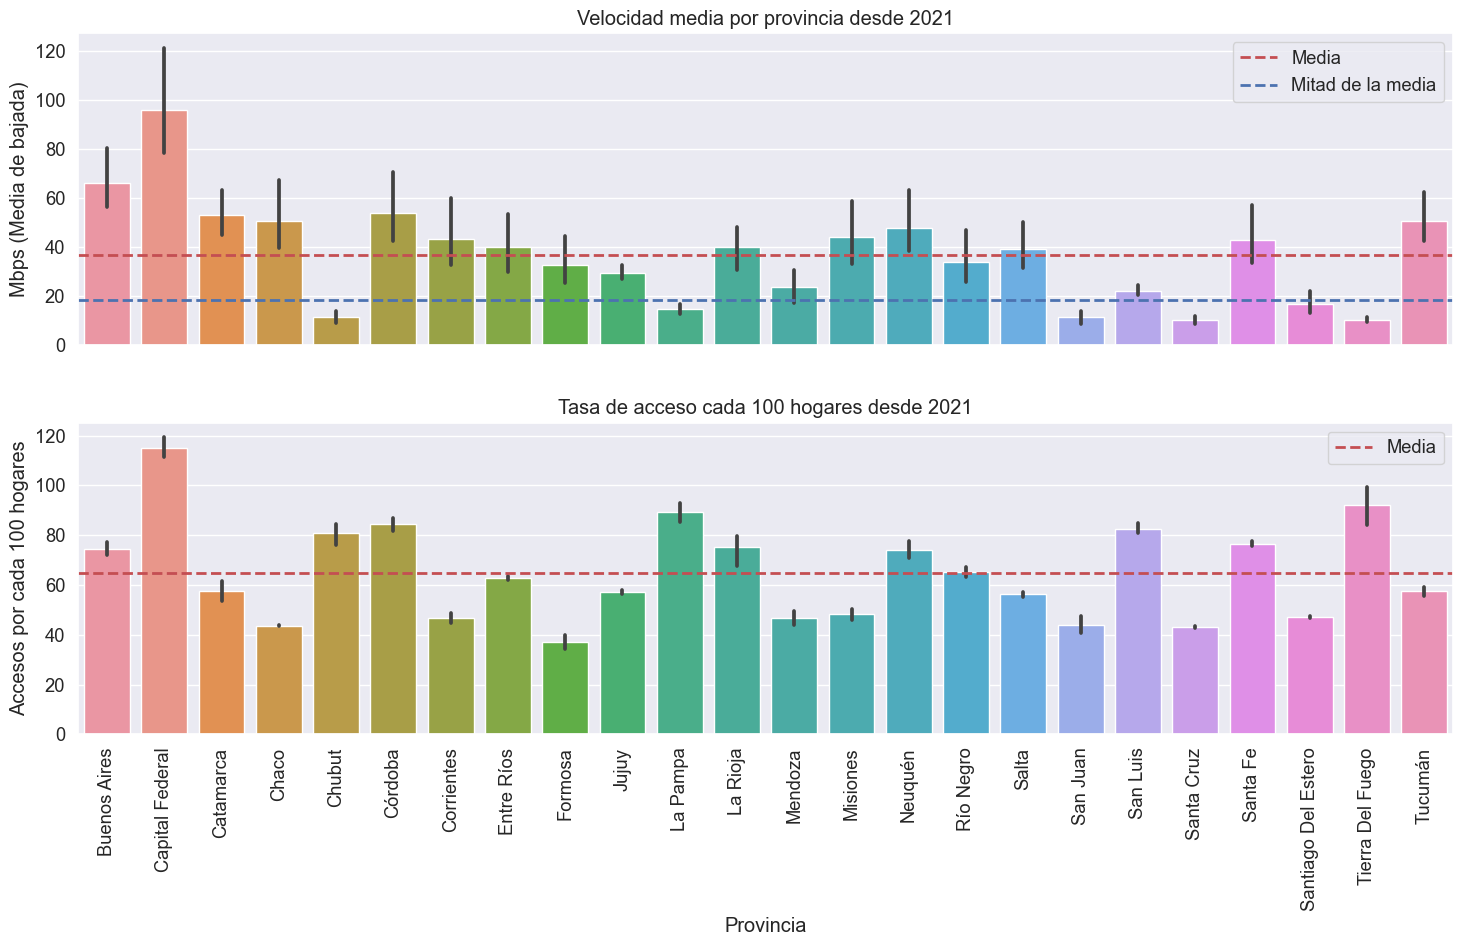

In [349]:
fig,ax = plt.subplots(2,1,figsize=(15,8))
sns.barplot(data=hist_vel_prov[hist_vel_prov['Año'] > 2020],y='Mbps (Media de bajada)',x='Provincia',ax = ax[0])
ax[0].axhline(y=hist_vel_prov[hist_vel_prov['Año'] > 2020]['Mbps (Media de bajada)'].mean(), color='r', linestyle='--', linewidth=2, label='Media')
ax[0].axhline(y=hist_vel_prov[hist_vel_prov['Año'] > 2020]['Mbps (Media de bajada)'].mean()/2, color='b', linestyle='--', linewidth=2, label='Mitad de la media')

sns.barplot(data=pen_prov[pen_prov['Año'] > 2020],y='Accesos por cada 100 hogares',x='Provincia',ax=ax[1])
ax[1].axhline(y=pen_prov[pen_prov['Año'] > 2020]['Accesos por cada 100 hogares'].mean(), color='r', linestyle='--', linewidth=2, label='Media')
plt.tight_layout()
plt.xticks(rotation=90)

ax[0].set_xticks([])
ax[0].set_xlabel('')
ax[0].legend()
ax[1].legend()
ax[0].set_title('Velocidad media por provincia desde 2021')
ax[1].set_title('Tasa de acceso cada 100 hogares desde 2021')
plt.show()

Como se ve las provincias de Chubut La Pampa San Luis Tierra del Fuego, tienen una alta tasa de acceso cada 100 hogares pero una velocidad muy por debajo de la media, esto podria deberse a que son zonas rurales y de  baja densidad poblacional.
Para estas provincias voy a hacer un analisis con sus tipos de conexion

In [350]:
provincias_baja_vel = ['Chubut','La Pampa','San Luis','Tierra Del Fuego']

In [351]:
tecnologias = ['ADSL','Cablemodem','Fibra óptica','Wireless','Otros']

In [352]:
acc_tec_prov_año = acc_tec_prov[acc_tec_prov['Provincia'].isin(pd.Series(provincias_baja_vel))]
acc_tec_prov_año = acc_tec_prov_año.groupby('Provincia')[tecnologias].sum().reset_index()
acc_tec_prov

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,325908.0,2767247.0,1499149.0,129910.0,72451.0,4794665.0
1,2022,4,Capital Federal,138753.0,1238196.0,138548.0,4603.0,31826.0,1551926.0
2,2022,4,Catamarca,8952.0,10998.0,47337.0,1379.0,2243.0,70909.0
3,2022,4,Chaco,24582.0,61265.0,47285.0,7957.0,2574.0,143663.0
4,2022,4,Chubut,45450.0,73923.0,9815.0,30721.0,8850.0,168759.0
...,...,...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,18927.0,100.0,381.0,4092.0,3264.0,26764.0
860,2014,1,Santa Fe,322662.0,174296.0,3059.0,5951.0,644.0,506612.0
861,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
862,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0


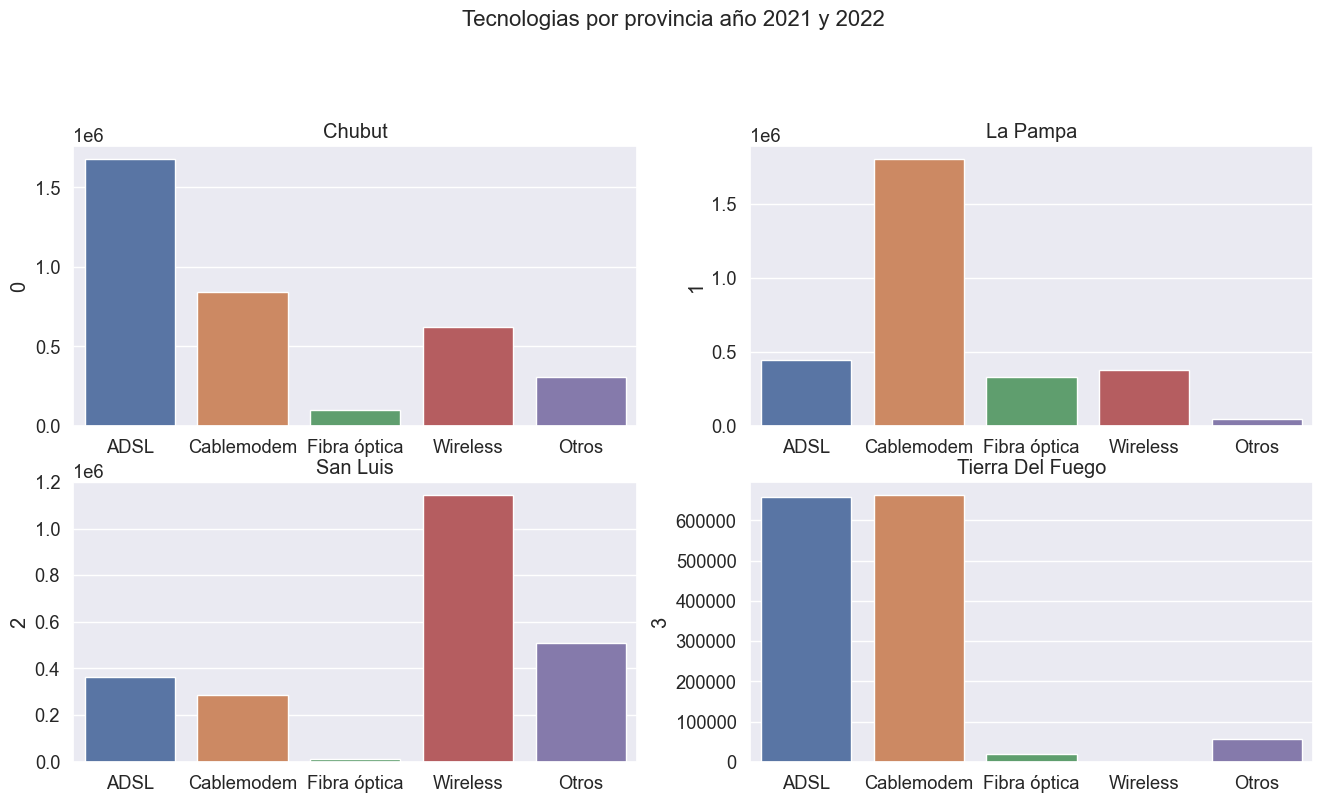

In [353]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
colores = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
fig.suptitle('Tecnologias por provincia año 2021 y 2022', fontsize=16, y=1.05)
for i in range(2):
    for j in range(2):
        explode = (0, 0, 0.1, 0, 0)
        sns.barplot(y = acc_tec_prov_año.iloc[j+2*i,1:], x=tecnologias,ax = ax[i,j])
        ax[i,j].set_title(acc_tec_prov_año.iloc[j+2*i,0])

En todas las provincias se ve una proporcion muy baja de Fibra óptica (Una de las tecnologias mas rapidas) por lo tanto un aumneto en este podria y debido a la alta tasa de acceso podria solventar la alta demanda.

Genero un dataframe con los vals por provincia de la superficie en km2

In [382]:
data = {
    'Provincia': ['Capital Federal', 'Buenos Aires', 'Catamarca', 'Chaco', 'Chubut', 'Cordoba',
               'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza', 'Misiones',
               'Neuquén', 'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe',
               'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
    'Poblacion': [3075646, 17541141, 415438, 1204541, 618994, 3760450, 1120801, 1385961, 605193, 770881,
                  358428, 393531, 1990338, 1261294, 664057, 747610, 1424397, 781217, 508328, 365698, 3536418,
                  978313, 173715, 1694656],
    'Superficie': [205.9, 305907.4, 101486.1, 99763.3, 224302.3, 164707.8, 89123.3, 78383.7, 75488.3, 53244.2,
                   143492.5, 91493.7, 149069.2, 29911.4, 94422, 202168.6, 155340.5, 88296.2, 75347.1, 244457.5,
                   133249.1, 136934.3, 910324.4, 22592.1]
}

superficie_prov = pd.DataFrame(data)

superficie_prov.to_excel('regions_area.xlsx', index=False)

Calculo para cada provincia la densidad poblacion por km2

In [383]:
superficie_prov['Densidad Poblacional'] = superficie_prov['Poblacion'] / superficie_prov['Superficie']


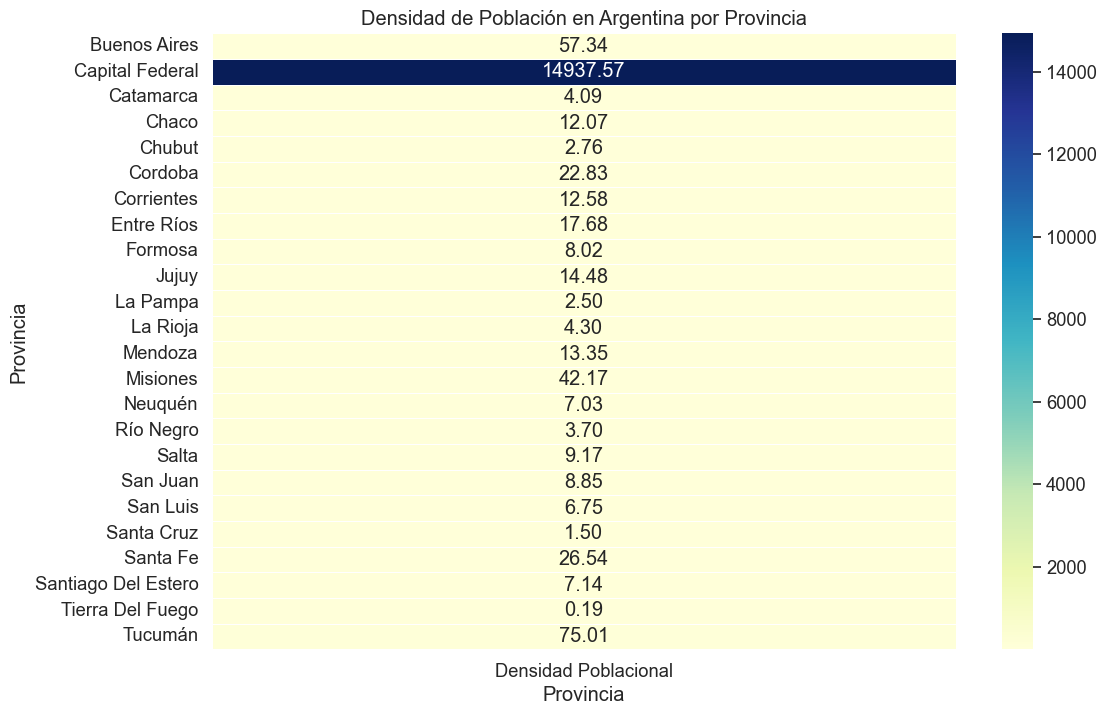

In [390]:
matriz_correlacion = superficie_prov.pivot_table(index='Provincia', values='Densidad Poblacional')
sns.set(font_scale=1.2)  # Ajustar el tamaño de la fuente para una mejor legibilidad
plt.figure(figsize=(12, 8))  # Ajustar el tamaño del gráfico según sea necesario
sns.heatmap(matriz_correlacion, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=.5)
plt.title('Densidad de Población en Argentina por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Provincia')
plt.show()

Se puede observar que para las pronvicias mencionadas anteriormente con una alta tase de penetracion cada 100 hogares y una velocidad media de bajada muy por debajo del promedio nacional, tienen una densidad poblacional muy baja. Por esto generar infraestructura como fibra optica podria ser muy costoso en funcion del beneficio,en estas zonas podria promoverse solucioines wireless, ya que ofrecen una alta velocidad y un costo no tan elevado respecto a fibra optica.

KPIPOSIBLES:
+ NFibraOptica - NCablemodem / NFibraOptica+NCablecom * 100 disminuya en un 15%
+ WirelessF - WirelessI/ WirelessI * 100 aumente en un 25% a nivel anual
+ KPI:porcentaje de mejora de la velocidad media  Vmf - Vmi /Vmi * 100 sea superior al 30%

In [360]:
#promedio_por_trimestre['Diferencia_Relativa'] = promedio_por_trimestre.groupby('Provincia')['Accesos por cada 100 hogares'].diff() / promedio_por_trimestre['Accesos por cada 100 hogares'] * 100
# Para calcular respecto al anterior

Primer KPI: Aumentar en un 2% la tasa de acceso de un trimestre respecto al trimestre siguiente

In [361]:
promedio_por_trimestre = pen_prov.groupby(['Año', 'Provincia', 'Trimestre'])['Accesos por cada 100 hogares'].mean().reset_index()

# Calcula la diferencia entre los valores promedio y divídelos por el valor actual de la fila
#promedio_por_trimestre['Diferencia_Relativa'] = (promedio_por_trimestre.groupby('Provincia')['Accesos por cada 100 hogares'].shift(-1) - promedio_por_trimestre['Accesos por cada 100 hogares']) / promedio_por_trimestre['Accesos por cada 100 hogares'] * 100

promedio_por_trimestre['Diferencia_Relativa'] = promedio_por_trimestre.groupby('Provincia')['Accesos por cada 100 hogares'].diff() / promedio_por_trimestre['Accesos por cada 100 hogares'] * 100


Remplazo los nulos para poder cargarlos

In [362]:
promedio_por_trimestre.fillna(0,inplace=True)

## Exporto las tablas utiles a MYSQL

Primero genero un id unico para las tablas con provincia año y trimestre

In [363]:
import pymysql as mysql
conexion = mysql.connect(host = 'localhost',
                         user = 'root',
                         password = 'root')
cursor = conexion.cursor()

In [364]:
cursor.execute('DROP DATABASE IF EXISTS acces_internet')
cursor.execute('CREATE DATABASE acces_internet')
conexion.commit()

In [365]:
cursor.execute('use acces_internet')
conexion.commit()

### Accesos por tasa de población

In [366]:
cursor.execute('DROP TABLE IF EXISTS tasa_acceso_provincia')
cursor.execute("""CREATE TABLE tasa_acceso_provincia (
                                        Id_datos_poblacion INTEGER PRIMARY KEY AUTO_INCREMENT,
                                        Año	INTEGER NOT NULL,
                                        Provincia VARCHAR(50) NOT NULL,
                                        Trimestre INTEGER NOT NULL,
                                        Acceso_cada_100_hogares DECIMAL(16,4),
                                        Diferencia_Relativa DECIMAL(16,4)
               ) """)
conexion.commit()

In [367]:
cursor.executemany("""
                   INSERT INTO tasa_acceso_provincia
                   VALUES(NULL,%s,%s,%s,%s,%s)         
                   """,(promedio_por_trimestre.values.tolist()))
conexion.commit()

### Acceso fijo banda ancha y dial up

In [368]:
cursor.execute('DROP TABLE IF EXISTS acceso_BA_provincia')
cursor.execute("""CREATE TABLE acceso_BA_provincia (
                                        Id_datos_poblacion INTEGER PRIMARY KEY AUTO_INCREMENT,
                                        Año	INTEGER NOT NULL,
                                        Trimestre INTEGER NOT NULL,
                                        Provincia VARCHAR(50) NOT NULL,
                                        Banda_ancha_fija INTEGER NOT NULL,
                                        Dial_up INTEGER NOT NULL,
                                        Total  INTEGER NOT NULL
               ) """)
conexion.commit()

In [369]:
cursor.executemany("""
                   INSERT INTO acceso_BA_provincia
                   VALUES(NULL,%s,%s,%s,%s,%s,%s)         
                   """,(tot_prov_acc_fijo_ba_ban.values.tolist()))
conexion.commit()

### Accesos por tecnologia

In [370]:
cursor.execute('DROP TABLE IF EXISTS acceso_tec_provincia')
cursor.execute("""CREATE TABLE acceso_tec_provincia (
                                        Id_datos_poblacion INTEGER PRIMARY KEY AUTO_INCREMENT,
                                        Año	INTEGER NOT NULL,
                                        Trimestre INTEGER NOT NULL,
                                        Provincia VARCHAR(50) NOT NULL,
                                        ADSL  INTEGER NOT NULL,
                                        Cablemodem INTEGER NOT NULL,
                                        Fibra_optica  INTEGER NOT NULL,
                                        Wireless  INTEGER NOT NULL,
                                        Otros INTEGER NOT NULL,
                                        Total INTEGER NOT NULL
               ) """)
conexion.commit()

In [371]:
cursor.executemany("""
                   INSERT INTO acceso_tec_provincia
                   VALUES(NULL,%s,%s,%s,%s,%s,%s,%s,%s,%s)         
                   """,(acc_tec_prov.values.tolist()))
conexion.commit()

### Historico de velocidad media de bajada

In [372]:
cursor.execute('DROP TABLE IF EXISTS historico_velocidad')
cursor.execute("""CREATE TABLE historico_velocidad (
                                        Id_datos_poblacion INTEGER PRIMARY KEY AUTO_INCREMENT,
                                        Año	INTEGER NOT NULL,
                                        Trimestre INTEGER NOT NULL,
                                        Provincia VARCHAR(50) NOT NULL,
                                        Mbps_Media_debajada DECIMAL(13,5) NOT NULL
                                        
               ) """)
conexion.commit()

In [373]:
cursor.executemany("""
                   INSERT INTO historico_velocidad
                   VALUES(NULL,%s,%s,%s,%s)         
                   """,(hist_vel_prov.values.tolist()))
conexion.commit()

In [388]:
cursor.execute('DROP TABLE IF EXISTS datos_poblacion')
cursor.execute("""CREATE TABLE datos_poblacion (
                                        Id_datos_poblacion INTEGER PRIMARY KEY AUTO_INCREMENT,
                                        Provincia VARCHAR(50) NOT NULL,
                                        Poblacion INTEGER NOT NULL,
                                        AreaKM2 DECIMAL(13,5) NOT NULL,
                                        Densidad_Poblacional DECIMAL(13,5) NOT NULL
               ) """)
conexion.commit()



In [391]:

cursor.executemany("""
                   INSERT INTO datos_poblacion
                   VALUES(NULL,%s,%s,%s,%s)         
                   """,(superficie_prov.values.tolist()))
conexion.commit()